In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

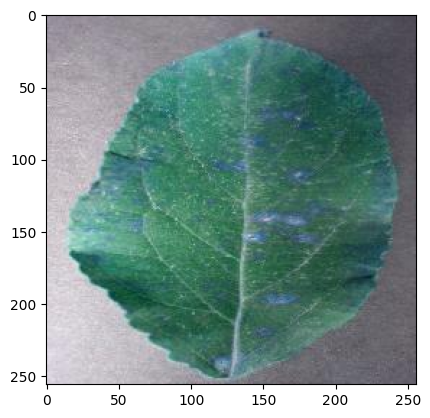

In [25]:
img = cv2.imread('./image.jpg')
plt.imshow(img)
plt.show()

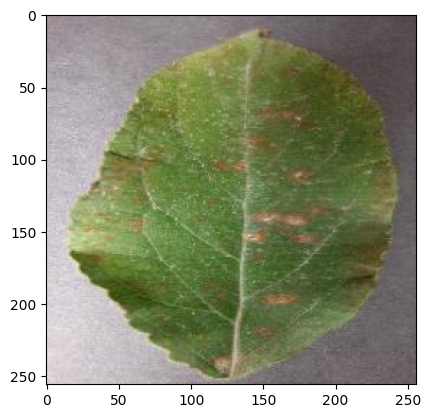

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

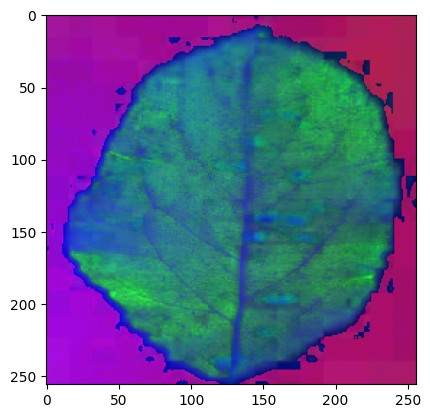

In [27]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

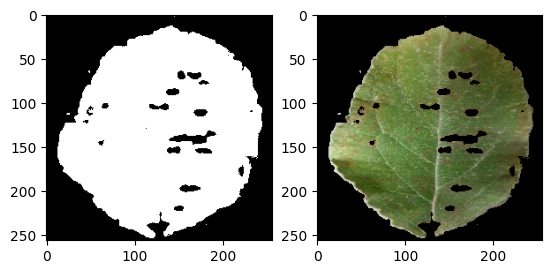

In [28]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

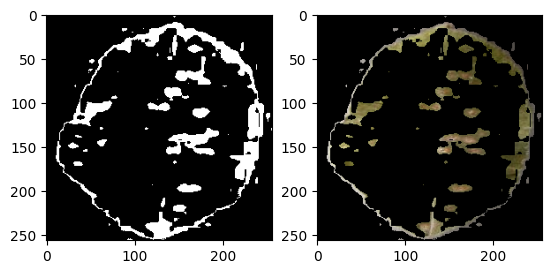

In [29]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

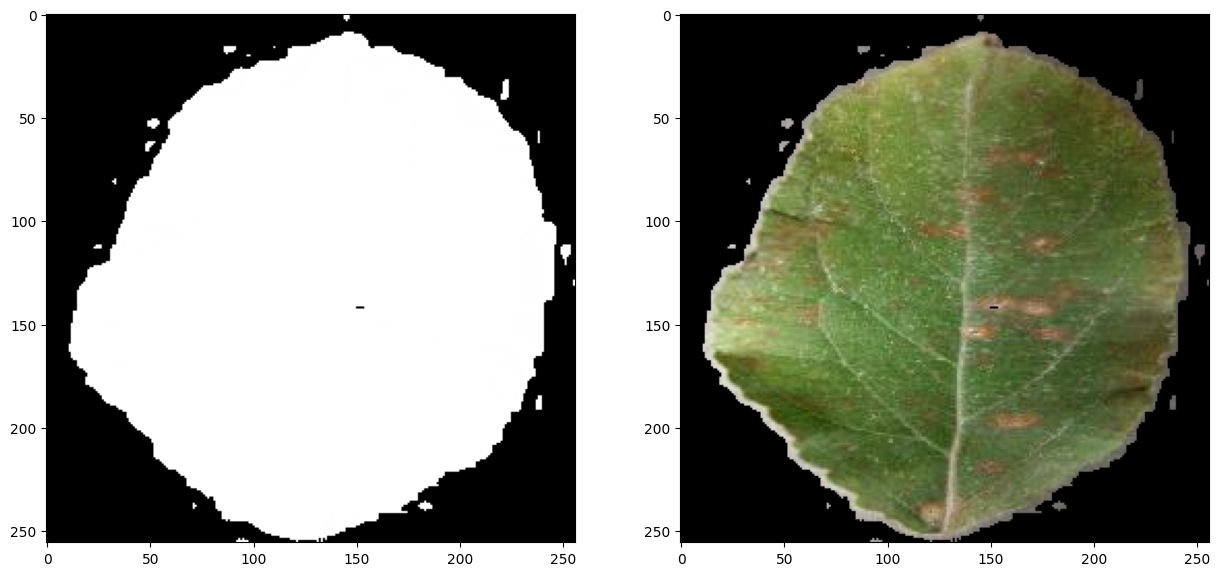

In [30]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [31]:
# Feature Descripotor
orb = cv2.ORB_create(nfeatures=400)
kp, des = orb.detectAndCompute(final_result, None)

# Find keypoints and descriptors directly
len(kp)

273

In [32]:
print(kp)

(< cv2.KeyPoint 0x14e6ac540>, < cv2.KeyPoint 0x16a3a16f0>, < cv2.KeyPoint 0x16a3a17b0>, < cv2.KeyPoint 0x16a2d5f60>, < cv2.KeyPoint 0x16a2d5ba0>, < cv2.KeyPoint 0x16a2e0f30>, < cv2.KeyPoint 0x16a2e0f60>, < cv2.KeyPoint 0x16a378ab0>, < cv2.KeyPoint 0x16a3787b0>, < cv2.KeyPoint 0x16a3788a0>, < cv2.KeyPoint 0x16a378f00>, < cv2.KeyPoint 0x16a3788d0>, < cv2.KeyPoint 0x16a378e40>, < cv2.KeyPoint 0x16a3786f0>, < cv2.KeyPoint 0x16a3783f0>, < cv2.KeyPoint 0x16a2ae3c0>, < cv2.KeyPoint 0x16a2ae390>, < cv2.KeyPoint 0x16a2ae5a0>, < cv2.KeyPoint 0x16a2aea50>, < cv2.KeyPoint 0x16a2aeba0>, < cv2.KeyPoint 0x16a2aeb10>, < cv2.KeyPoint 0x16a2ae450>, < cv2.KeyPoint 0x16a2aec90>, < cv2.KeyPoint 0x16a2aea80>, < cv2.KeyPoint 0x16a2ae1e0>, < cv2.KeyPoint 0x16a2ae030>, < cv2.KeyPoint 0x16a2aed20>, < cv2.KeyPoint 0x16a2aec00>, < cv2.KeyPoint 0x16a2ae570>, < cv2.KeyPoint 0x16a2ae4e0>, < cv2.KeyPoint 0x16a2aec60>, < cv2.KeyPoint 0x16a2ae4b0>, < cv2.KeyPoint 0x16a2aecc0>, < cv2.KeyPoint 0x16a362c60>, < cv2.KeyPoin

In [33]:
print(des)

[[ 76  99 197 ... 247 116 240]
 [ 50   1  38 ...  14  61 134]
 [194  65 134 ...  38  37   6]
 ...
 [214 255 155 ... 115 135 101]
 [205  36 152 ...  80 139  40]
 [249 199  44 ... 166  90  76]]


In [34]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

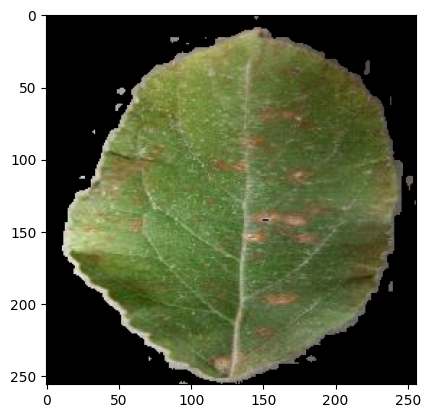

In [35]:
plt.imshow(final_result)


In [36]:
# global Feature
global_feature = des

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [38]:
global_feature.shape

(273, 32)

In [39]:
orb.descriptorSize()

32

In [40]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (273, 32)


In [41]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")